# Support Vector Machines (SVM)

## Problem Type
**Support Vector Machines (SVM)** are primarily used for:
- **Classification** (binary and multiclass)
- **Regression** (Support Vector Regression - SVR)
- **Supervised** learning

### How SVM Works
- **Finds the optimal hyperplane** that maximizes the margin between the closest data points of different classes (support vectors).
- **Maximizes the margin** between classes to ensure better generalization.
- **Uses different kernel functions** (linear, polynomial, RBF, etc.) to handle non-linearly separable data by transforming the data into a higher-dimensional space.
- **Supports both hard margin and soft margin** classification:
  - **Hard margin**: Requires all data points to be correctly classified.
  - **Soft margin**: Allows some misclassification to create a more generalizable model.

### Key Tuning Metrics
- **`C`:**
  - **Description:** Regularization parameter that controls the trade-off between maximizing the margin and minimizing classification errors.
  - **Impact:** Smaller `C` values increase the margin but allow more misclassifications (higher bias, lower variance); larger `C` values make the margin smaller with fewer misclassifications (lower bias, higher variance).
  - **Default:** `C = 1.0`.
- **`kernel`:**
  - **Description:** Specifies the kernel type to be used in the algorithm (`linear`, `poly`, `rbf`, `sigmoid`).
  - **Impact:** Determines the decision boundary shape. The `linear` kernel is best for linearly separable data; `rbf` and `poly` can handle non-linear relationships.
  - **Default:** `rbf` (Radial Basis Function).
- **`gamma`:**
  - **Description:** Kernel coefficient for `rbf`, `poly`, and `sigmoid` kernels.
  - **Impact:** Controls the influence of individual training examples. Lower `gamma` values mean a larger influence radius (smoother decision boundary); higher `gamma` values lead to a more complex boundary.
  - **Default:** `scale`, which is `1 / (n_features * X.var())`.
- **`degree`:**
  - **Description:** Degree of the polynomial kernel function (only used with `poly` kernel).
  - **Impact:** Determines the flexibility of the decision boundary when using polynomial kernels.
  - **Default:** `degree = 3`.
- **`coef0`:**
  - **Description:** Independent term in kernel function (used for `poly` and `sigmoid`).
  - **Impact:** Controls the influence of higher-degree polynomials in the decision function.
  - **Default:** `coef0 = 0.0`.

### Pros vs Cons

| Pros                                                  | Cons                                                   |
|-------------------------------------------------------|--------------------------------------------------------|
| Effective for high-dimensional spaces                 | Computationally intensive, especially with large datasets |
| Works well with clear margin of separation            | Choosing the right kernel and hyperparameters can be complex |
| Handles both linear and non-linear classification     | Sensitive to noisy data and outliers                   |
| Flexible through different kernel choices             | SVM models can be difficult to interpret               |
| Supports soft margin for better generalization        | Memory-intensive during training                       |

### Evaluation Metrics
- **Accuracy:**
  - **Description:** Ratio of correct predictions to total predictions.
  - **Good Value:** Higher is better; generally, above 0.8 is considered good for classification tasks.
  - **Bad Value:** Below 0.5 indicates poor performance (worse than random guessing in binary classification).
- **Precision:**
  - **Description:** Proportion of positive identifications that were actually correct (True Positives / (True Positives + False Positives)).
  - **Good Value:** Higher is better, especially when False Positives are costly.
  - **Bad Value:** Low values indicate many False Positives.
- **Recall (Sensitivity):**
  - **Description:** Proportion of actual positives that were correctly identified (True Positives / (True Positives + False Negatives)).
  - **Good Value:** Higher is better, especially when False Negatives are costly.
  - **Bad Value:** Low values indicate many False Negatives.
- **F1 Score:**
  - **Description:** Harmonic mean of Precision and Recall; balances the trade-off between the two.
  - **Good Value:** Higher is better; values above 0.7-0.8 indicate strong performance.
  - **Bad Value:** Lower values indicate an imbalanced trade-off between Precision and Recall.
- **ROC-AUC:**
  - **Description:** Area under the Receiver Operating Characteristic curve, showing the trade-off between True Positive Rate (TPR) and False Positive Rate (FPR).
  - **Good Value:** Closer to 1 is better; above 0.8 indicates good discrimination between classes.
  - **Bad Value:** Close to 0.5 suggests the model is no better than random guessing.
- **Support Vectors:**
  - **Description:** Number of support vectors used by the model; a higher number can indicate a more complex model.
  - **Good Value:** Lower numbers can indicate a simpler, more generalizable model.
  - **Bad Value:** Very high numbers can indicate overfitting or a model struggling with noise.



In [1]:
from math import sqrt

import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import (accuracy_score, classification_report,
                             mean_absolute_error, mean_squared_error, r2_score)
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import KBinsDiscretizer, StandardScaler
from sklearn.svm import SVC, SVR

In [2]:
# Load the dataset
housing = fetch_california_housing()
X = housing.data
y = housing.target

In [3]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
# Create a Linear SVM object
linear_svm = SVR(C=1, kernel="linear", gamma="scale")

# Train the model
linear_svm.fit(X_train, y_train)

# Make predictions
y_pred = linear_svm.predict(X_test)

## Model Evaluation

In [6]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

rmse = sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

Mean Squared Error: 0.5792224848666966
Root Mean Squared Error: 0.7610666757037103
R-squared: 0.5579834277049536
Mean Absolute Error: 0.5119686230334923


In [7]:
cross_val_scores = cross_val_score(linear_svm, X_train, y_train, cv=5)
print(f"Cross Validation Scores (Linear SVM): {cross_val_scores}")

Cross Validation Scores (Linear SVM): [ 0.60520403  0.59345466 -3.48688444  0.29144352  0.4078855 ]


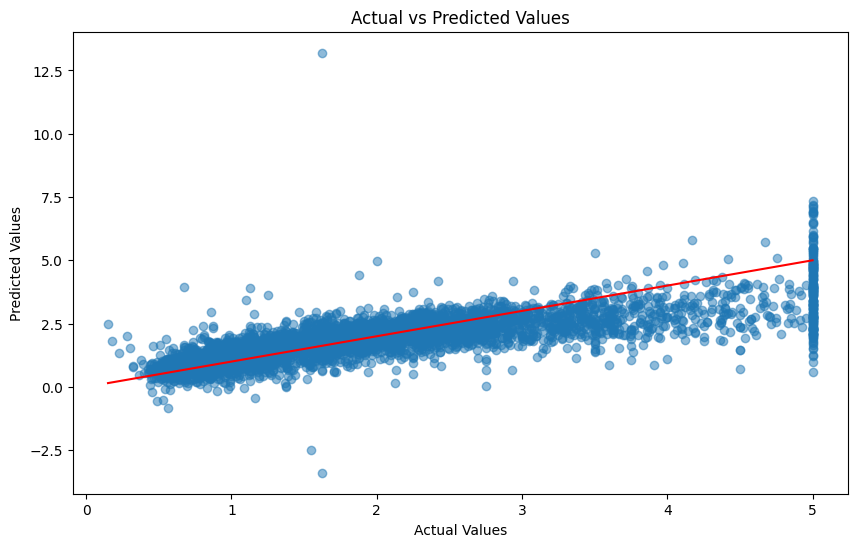

In [8]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot(
    [min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red"
)  # line y = x
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()

In [9]:
# Discretize the target variable into 3 classes (e.g., low, medium, high)
binner = KBinsDiscretizer(n_bins=3, encode="ordinal", strategy="uniform")
y_binned = binner.fit_transform(y.reshape(-1, 1)).ravel()

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y_binned, test_size=0.2, random_state=42
)

In [10]:
# Initialize an SVM model for classification
svm_model = SVC(kernel="rbf", gamma="scale", C=1.0, random_state=42)

# Fit the model to the training data
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_model.predict(X_test)

In [11]:
# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['Low', 'Medium', 'High'])

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)


Accuracy: 0.49
Classification Report:
              precision    recall  f1-score   support

         Low       0.49      1.00      0.66      2031
      Medium       0.44      0.01      0.01      1518
        High       0.00      0.00      0.00       579

    accuracy                           0.49      4128
   macro avg       0.31      0.33      0.22      4128
weighted avg       0.40      0.49      0.33      4128



/home/ubuntu/.cache/pypoetry/virtualenvs/machine-learning-ktax2Mo_-py3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ubuntu/.cache/pypoetry/virtualenvs/machine-learning-ktax2Mo_-py3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ubuntu/.cache/pypoetry/virtualenvs/machine-learning-ktax2Mo_-py3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicte

In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import KBinsDiscretizer, label_binarize
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the dataset
housing = fetch_california_housing()
X = housing.data
y = housing.target

In [2]:
# Discretize the target variable into 3 classes (e.g., low, medium, high)
binner = KBinsDiscretizer(n_bins=3, encode="ordinal", strategy="uniform")
y_binned = binner.fit_transform(y.reshape(-1, 1)).ravel()

# Binarize the output for ROC-AUC computation
y_binarized = label_binarize(y_binned, classes=[0, 1, 2])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y_binned, test_size=0.2, random_state=42
)

In [3]:
# Standardize the features for better SVM performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
# Initialize an SVM model with probability outputs
svm_model = OneVsRestClassifier(SVC(kernel='rbf', gamma='scale', C=1.0, probability=True, random_state=42))

# Fit the model to the training data
svm_model.fit(X_train, y_train)

OneVsRestClassifier(estimator=SVC(probability=True, random_state=42))

In [4]:
# Predict probabilities for the test set
y_score = svm_model.decision_function(X_test)

NameError: name 'svm_model' is not defined

In [18]:


# Calculate ROC-AUC for each class
roc_auc = {}
for i in range(3):
    roc_auc[i] = roc_auc_score(y_binarized[:, i], y_score[:, i])

# Plot ROC curves for each class
fpr = {}
tpr = {}
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_binarized[:, i], y_score[:, i])

# plt.figure(figsize=(8, 6))
# for i in range(3):
#     plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

# plt.plot([0, 1], [0, 1], 'k--', lw=2)
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curves for California Housing SVM Classifier')
# plt.legend(loc="lower right")
# plt.grid(True)
# plt.show()


ValueError: Found input variables with inconsistent numbers of samples: [20640, 4128]